# Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Loading data

In [32]:
df = pd.read_csv('NFA-2018-Edition.csv')
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140020,0.199159,0.097000,0.036817,0.029258,0.000000,5.022540e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100925.003100,0.000000,1.732525e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.000000,4.273741e-01,3A
3,Armenia,1992,1,BiocapTotGHA,555812.972600,465763.337400,289190.662300,47320.224590,116139.598200,0.000000,1.474227e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,1.730092e+00,3A


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69616 entries, 0 to 69615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         69616 non-null  object 
 1   year            69616 non-null  int64  
 2   country_code    69616 non-null  int64  
 3   record          69616 non-null  object 
 4   crop_land       50824 non-null  float64
 5   grazing_land    50824 non-null  float64
 6   forest_land     50824 non-null  float64
 7   fishing_ground  50824 non-null  float64
 8   built_up_land   50824 non-null  float64
 9   carbon          50824 non-null  float64
 10  total           69616 non-null  float64
 11  QScore          69616 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 6.4+ MB


# Dealing with missing values

In [34]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [35]:
df.isnull().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

# Dealing with outliers

In [36]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 1.5

In [37]:
df = df[(z_scores < threshold).all(axis=1)]

In [38]:
df.to_csv('cleaned_dataset.csv', index=False)

# Statistics

In [39]:
numerical_columns = ["crop_land", "grazing_land", "forest_land", "fishing_ground", "built_up_land", "carbon", "total"]
statistics = {
    "Column": numerical_columns,
    "Mean": [],
    "Trimmed Mean": [],
    "Median": [],
    "Variance": [],
    "Standard Deviation": [],
    "Mean Deviation": [],
    "Median Deviation": []
}

In [40]:
for column in numerical_columns:
    data = df[column]
    mean = np.mean(data)
    trimmed_mean = np.mean(data[(data >= np.percentile(data, 5)) & (data <= np.percentile(data, 95))])
    median = np.median(data)
    variance = np.var(data)
    std_deviation = np.std(data)
    mean_deviation = np.mean(np.abs(data - mean))
    median_deviation = np.median(np.abs(data - median))

    statistics["Mean"].append(mean)
    statistics["Trimmed Mean"].append(trimmed_mean)
    statistics["Median"].append(median)
    statistics["Variance"].append(variance)
    statistics["Standard Deviation"].append(std_deviation)
    statistics["Mean Deviation"].append(mean_deviation)
    statistics["Median Deviation"].append(median_deviation)

statistics_df = pd.DataFrame(statistics)
statistics_df

,Column,Mean,Trimmed Mean,Median,Variance,Standard Deviation,Mean Deviation,Median Deviation
0,crop_land,8.719698e+06,7.051821e+06,1.787634e+06,1.946582e+14,1.395200e+07,9.712051e+06,1.787634e+06
1,grazing_land,6.142250e+06,4.861072e+06,7.898393e+05,1.208940e+14,1.099518e+07,7.062027e+06,7.898393e+05
2,forest_land,1.127496e+07,9.448770e+06,1.857111e+06,3.418002e+14,1.848784e+07,1.282085e+07,1.857111e+06
3,fishing_ground,4.559926e+06,3.605064e+06,2.740269e+05,7.136484e+13,8.447771e+06,5.303843e+06,2.740269e+05
4,built_up_land,9.046935e+05,7.279046e+05,2.042324e+05,2.122398e+12,1.456845e+06,9.992839e+05,2.042324e+05
5,carbon,1.294971e+07,9.194747e+06,2.414506e+00,9.008261e+14,3.001376e+07,1.660251e+07,2.414506e+00
6,total,2.031970e+07,1.018583e+07,3.273109e+01,3.433078e+15,5.859247e+07,2.857522e+07,3.248428e+01


In [41]:
statistics_df.to_csv('statistics.csv', index=False)

# Normalization

## min-max

In [42]:
df_min_max_norm = df.copy()
scaler = MinMaxScaler()
df_min_max_norm[numerical_columns] = scaler.fit_transform(df[numerical_columns])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [43]:
df_min_max_norm.to_csv('min_max_normalized_dataset.csv', index=False)

In [44]:
df_min_max_norm.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,6.094730e-10,1.133385e-09,2.997188e-10,2.958517e-10,1.252718e-09,0.000000e+00,4.087783e-10,3A
1,Armenia,1992,1,AreaTotHA,2.102377e-03,3.909612e-03,1.033880e-03,1.020540e-03,4.321252e-03,0.000000e+00,1.467251e-03,3A
2,Armenia,1992,1,BiocapPerCap,7.013519e-10,7.683977e-10,2.590433e-10,1.102344e-10,1.441568e-09,0.000000e+00,3.453635e-10,3A
3,Armenia,1992,1,BiocapTotGHA,2.419314e-03,2.650588e-03,8.935698e-04,3.802536e-04,4.972687e-03,0.000000e+00,1.248502e-03,3A
4,Armenia,1992,1,EFConsPerCap,1.701587e-09,1.076351e-09,3.862373e-15,3.324908e-11,1.441568e-09,2.129663e-09,1.448618e-09,3A


## mean

In [45]:
df_mean_norm = df.copy()
scaler = StandardScaler()
df_mean_norm[numerical_columns] = scaler.fit_transform(df[numerical_columns])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [46]:
df_mean_norm.to_csv('mean_normalized_dataset.csv', index=False)

In [47]:
df_mean_norm

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
1,Armenia,1992,1,AreaTotHA,-0.590360,-0.496149,-0.591760,-0.524745,-0.551718,-0.431459,-0.317228,3A
2,Armenia,1992,1,BiocapPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
3,Armenia,1992,1,BiocapTotGHA,-0.585141,-0.516270,-0.594216,-0.534177,-0.541275,-0.431459,-0.321636,3A
4,Armenia,1992,1,EFConsPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
69158,China,2011,351,EFProdPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
69160,China,2012,351,AreaPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
69162,China,2012,351,BiocapPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A
69164,China,2012,351,EFConsPerCap,-0.624979,-0.558631,-0.609858,-0.539779,-0.620995,-0.431459,-0.346797,3A


# Plots

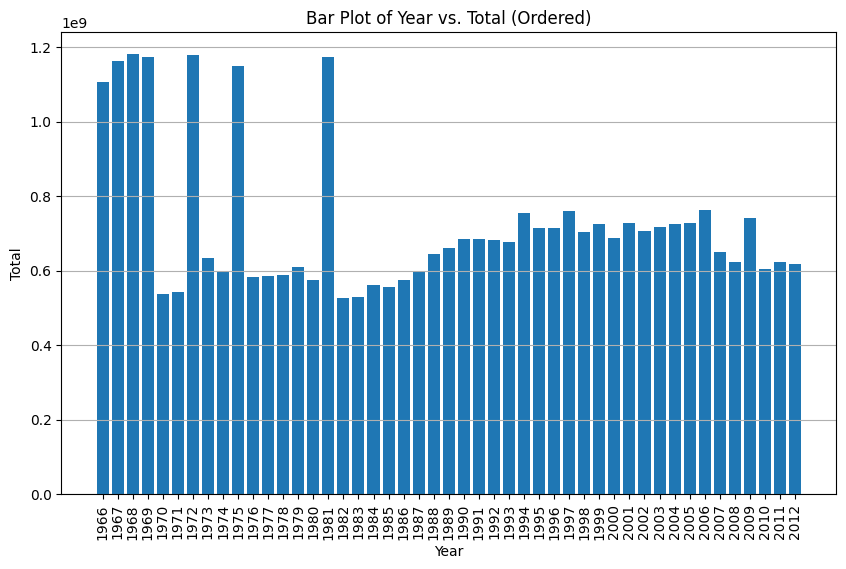

In [48]:
df = df.sort_values(by='year')
plt.figure(figsize=(10, 6))
bars = plt.bar(df['year'].astype(str), df['total'])  
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Bar Plot of Year vs. Total (Ordered)')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()


In [49]:
df_1966 = df[df['year'] == 1966]
df_2012 = df[df['year'] == 2012]
df_sorted_1966 = df_1966.sort_values(by='total', ascending=False)
df_sorted_2012 = df_2012.sort_values(by='total', ascending=False)
top_1966 = df_sorted_1966.head(15)
top_2012 = df_sorted_2012.head(15)

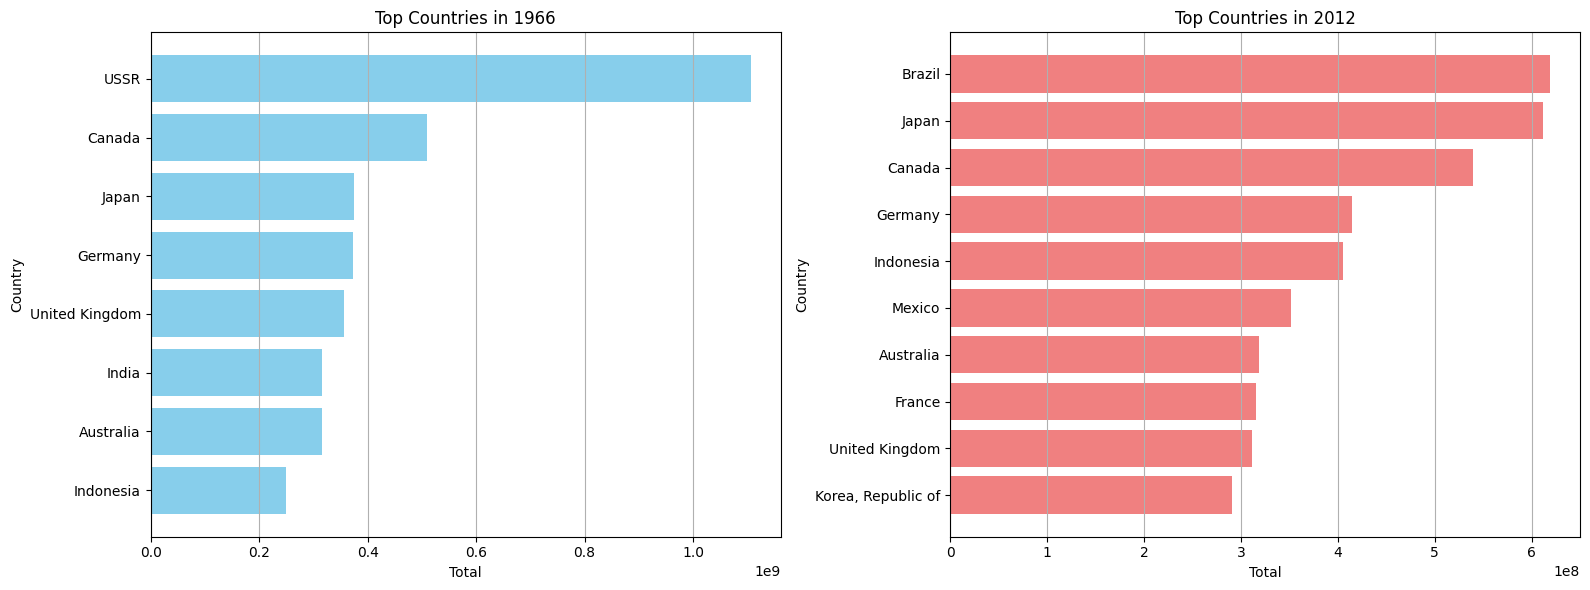

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(top_1966['country'], top_1966['total'], color='skyblue')
axes[0].set_xlabel('Total')
axes[0].set_ylabel('Country')
axes[0].set_title('Top Countries in 1966')
axes[0].invert_yaxis()
axes[0].grid(axis='x')

axes[1].barh(top_2012['country'], top_2012['total'], color='lightcoral')
axes[1].set_xlabel('Total')
axes[1].set_ylabel('Country')
axes[1].set_title('Top Countries in 2012')
axes[1].invert_yaxis()
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()


In [51]:
ukraine_data = df[df['country'] == 'Ukraine']
columns_to_plot = ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground', 'built_up_land', 'carbon']

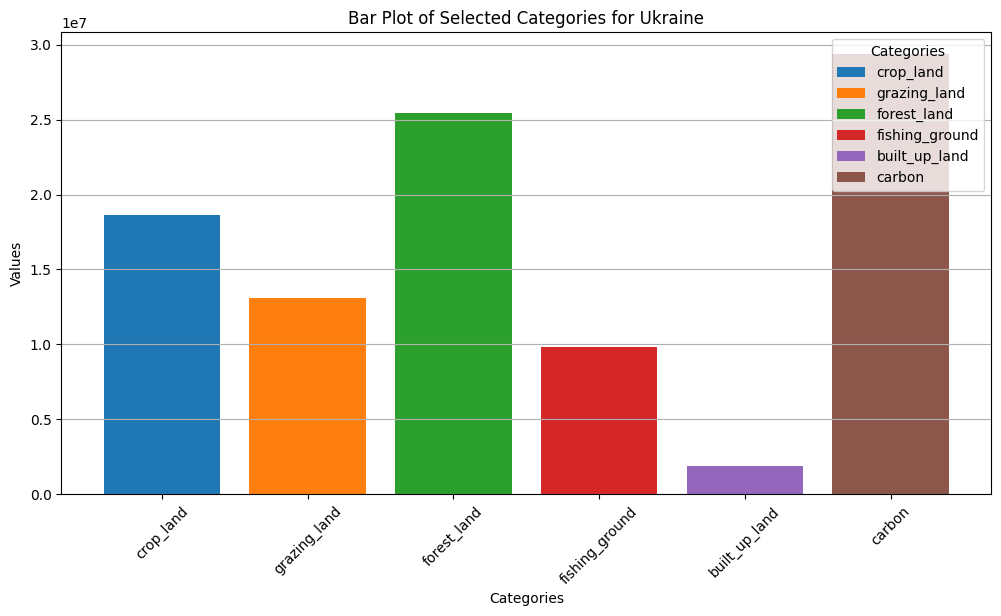

In [52]:
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.bar(column, ukraine_data[column], label=column)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot of Selected Categories for Ukraine')
plt.xticks(rotation=45)
plt.legend(title='Categories', loc='upper right')
plt.grid(axis='y')
plt.show()
